In [7]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import pandas as pd

In [8]:
df = pd.read_csv('/content/gdrive/MyDrive/Mestrado/healthMessagesJoinedClassification (2).csv')

In [31]:
from ast import literal_eval
import math
vals = []
for labels in df['OHC_categories']:
  try:
    print(literal_eval(labels))
    vals = vals + literal_eval(labels)
  except ValueError:
    print()


['emotional-support', 'informational-support', 'network-support']
['informational-support', 'sharing-experiences', 'emotional-support']
['informational-support', 'sharing-experiences', 'esteem-support', 'emotional-support']
['sharing-experiences']
['sharing-experiences', 'esteem-support']
['informational-support', 'sharing-experiences']

['seeking-support', 'network-support']
['sharing-experiences', 'emotional-support']
['esteem-support', 'sharing-experiences', 'emotional-support']
['interpersonal', 'sharing-experiences']
['seeking-support', 'sharing-experiences']
['sharing-experiences']
['emotional-support']
['emotional-support', 'esteem-support', 'network-support']
['sharing-experiences']
['sharing-experiences', 'emotional-support']
['interpersonal', 'sharing-experiences']
['informational-support']
['interpersonal', 'sharing-experiences']
['informational-support', 'sharing-experiences']
['interpersonal', 'informational-support']
['informational-support', 'sharing-experiences']
['info

In [33]:
set(vals)

{'emotional-support',
 'esteem-support',
 'informational-support',
 'interpersonal',
 'network-support',
 'seeking-support',
 'sharing-experiences'}

In [34]:
for i, row in df.iterrows():
    labels = row['OHC_categories']
    try:
      print(literal_eval(labels))
      current_ones = literal_eval(labels)

      for label in current_ones:
        df.at[i, label] = 1
    except ValueError:
      print()


['emotional-support', 'informational-support', 'network-support']
['informational-support', 'sharing-experiences', 'emotional-support']
['informational-support', 'sharing-experiences', 'esteem-support', 'emotional-support']
['sharing-experiences']
['sharing-experiences', 'esteem-support']
['informational-support', 'sharing-experiences']

['seeking-support', 'network-support']
['sharing-experiences', 'emotional-support']
['esteem-support', 'sharing-experiences', 'emotional-support']
['interpersonal', 'sharing-experiences']
['seeking-support', 'sharing-experiences']
['sharing-experiences']
['emotional-support']
['emotional-support', 'esteem-support', 'network-support']
['sharing-experiences']
['sharing-experiences', 'emotional-support']
['interpersonal', 'sharing-experiences']
['informational-support']
['interpersonal', 'sharing-experiences']
['informational-support', 'sharing-experiences']
['interpersonal', 'informational-support']
['informational-support', 'sharing-experiences']
['info

In [54]:
df2 = pd.read_csv('/content/gdrive/MyDrive/Mestrado/sentiment_relabel.csv')

In [55]:
df2.head()

,Unnamed: 0,Unnamed: 0.1,ID,labels,text,sentiment
0,0,0,1237715_0,"15,16,18,21",Hello! I'm brazilian and I'm 27 y/o. My life i...,negative
1,1,1,1237715_1,0,Your English is excellent. I think you probabl...,neutral
2,2,2,1237715_2,5,There is nothing to be ashamed of. Everyone ne...,neutral
3,3,3,1237715_3,"11,18",Hey!!! cant say anything but you are not alone...,neutral
4,4,4,1237715_4,0,Its your thyroid. Get it checked as soon as po...,neutral


In [63]:
c = 0
for text in df['text']:
  if text in list(df2['text']):
    c += 1
  else:
    print(text)

Hello and hope you are doing well.Understand your predicament. But the first step would be to stop becoming anxious. Variations in pattern of sleep can occur. But this will regularize with time. So, try to relax. And to most of the sedatives (sleeping tablets), people develop tolerance, that is they stop working very effectively with time. So, try to develop good sleep hygiene. Sleep and get up at the same time every day, avoid smoking, alcoholic and caffeinated beverages and exercise regularly.  Hope this helped and do keep us posted.
It would be hard to see any significant abnormalities in the scans and tests you had, if it is something like costochonditis. The general area where you are affected is consistent with costochonditis. Look it up on Gray's Anatomy online to do your own comparison.It's an inflammation of the area where the ribs connect with the cartridge which attaches them to the breastbone and usually gets diagnosed by physical examination and medical history.. The scans

In [65]:
df2

,Unnamed: 0,Unnamed: 0.1,ID,labels,text,sentiment
0,0,0,1237715_0,"15,16,18,21",Hello! I'm brazilian and I'm 27 y/o. My life i...,negative
1,1,1,1237715_1,0,Your English is excellent. I think you probabl...,neutral
2,2,2,1237715_2,5,There is nothing to be ashamed of. Everyone ne...,neutral
3,3,3,1237715_3,"11,18",Hey!!! cant say anything but you are not alone...,neutral
4,4,4,1237715_4,0,Its your thyroid. Get it checked as soon as po...,neutral
...,...,...,...,...,...,...
197,197,197,374338_5,18,I just had a similar experience of feeling a d...,neutral
198,198,198,374338_6,18,Thank you for posting. I saw starting to think...,negative
199,199,199,374338_7,18,During an induced 4 week coma following a hear...,neutral
200,200,200,374338_8,"18,20",I have been doing his for years. especially at...,negative


In [95]:
df

,text,neutral,positive,negative,emotional-support,informational-support,network-support,sharing-experiences,esteem-support,seeking-support,interpersonal,past-dataset
0,Hello and hope you are doing well.Understand y...,1,0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0
1,It would be hard to see any significant abnorm...,1,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0
2,"Hi James, I, too, go to bed by 10:00, then wa...",1,0,0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
3,"Hi, I am suffering from the same sleep problem...",0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,"me too, it feels like its morning after 1hour",1,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
482,I just had a similar experience of feeling a d...,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
483,Thank you for posting. I saw starting to think...,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
484,During an induced 4 week coma following a hear...,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
485,I have been doing his for years. especially at...,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [94]:
df['past-dataset'] = df.apply(lambda r : int(r.name >= 285), axis=1)

In [97]:
df.columns

Index(['text', 'neutral', 'positive', 'negative', 'emotional-support',
       'informational-support', 'network-support', 'sharing-experiences',
       'esteem-support', 'seeking-support', 'interpersonal', 'past-dataset'],
      dtype='object')

In [92]:
df = df.drop(columns=['Unnamed: 0', 'OHC_categories', 'sentiment'])

In [96]:
df.to_csv('FinalClassification.csv')

In [69]:
df['text'][487-202: ]

285    Hello! I'm brazilian and I'm 27 y/o. My life i...
286    Your English is excellent. I think you probabl...
287    There is nothing to be ashamed of. Everyone ne...
288    Hey!!! cant say anything but you are not alone...
289    Its your thyroid. Get it checked as soon as po...
                             ...                        
482    I just had a similar experience of feeling a d...
483    Thank you for posting. I saw starting to think...
484    During an induced 4 week coma following a hear...
485    I have been doing his for years. especially at...
486    i have a lot of similar actions im curious to ...
Name: text, Length: 202, dtype: object

In [51]:
df['seeking-support'].fillna(0, inplace=True)

In [14]:
df['negative'] = df['sentiment'].apply(lambda x: 0 if x != 'negative' else 1)

In [ ]:

values = []
for i, row in df.iterrows():
  if row['neutral'] == row['negative'] and row['negative'] == row['positive']:
    values.append(row['text'])

In [ ]:
for v in values:
  df3.loc[df3['text'] == v, 'sentiment'] = None


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
df3 = df3.rename(columns={'labels': 'OHC_categories'})

In [ ]:
df3

,text,sentiment,OHC_categories
0,Hello and hope you are doing well.Understand y...,neutral,"['emotional-support', 'informational-support',..."
1,It would be hard to see any significant abnorm...,neutral,"['informational-support', 'sharing-experiences..."
2,"Hi James, I, too, go to bed by 10:00, then wa...",neutral,"['informational-support', 'sharing-experiences..."
3,"Hi, I am suffering from the same sleep problem...",negative,['sharing-experiences']
4,"me too, it feels like its morning after 1hour",neutral,"['sharing-experiences', 'esteem-support']"
...,...,...,...
482,I just had a similar experience of feeling a d...,neutral,['sharing-experiences']
483,Thank you for posting. I saw starting to think...,negative,['sharing-experiences']
484,During an induced 4 week coma following a hear...,neutral,['sharing-experiences']
485,I have been doing his for years. especially at...,negative,['sharing-experiences']


In [ ]:
df3.to_csv('healthMessagesJoinedClassification.csv')

In [ ]:
df2 = pd.read_csv('/content/gdrive/My Drive/Mestrado//second_level_preprocessed.csv')

In [ ]:
df2

,Unnamed: 0,Unnamed: 0.1,text,labels,text_processed
0,0,0,Hello and hope you are doing well.Understand y...,"['emotional-support', 'informational-support',...",Hello and hope you are doing well.Understand y...
1,1,1,It would be hard to see any significant abnorm...,"['informational-support', 'sharing-experiences...",It would be hard to see any significant abnorm...
2,2,2,"Hi James, I, too, go to bed by 10:00, then wa...","['informational-support', 'sharing-experiences...","Hi James, I, tsurprised, go to bed by <TIME>, ..."
3,3,3,"Hi, I am suffering from the same sleep problem...",['sharing-experiences'],"Hi, am suffering from the same sleep problems...."
4,4,4,"me too, it feels like its morning after 1hour","['sharing-experiences', 'esteem-support']","me tsurprised, it feels like its <TIME> after ..."
...,...,...,...,...,...
448,448,448,I just had a similar experience of feeling a d...,['sharing-experiences'],just had similar eplayfulerience of feeling dr...
449,449,449,Thank you for posting. I saw starting to think...,['sharing-experiences'],Thank you for posting. saw starting to think w...
450,450,450,During an induced 4 week coma following a hear...,['sharing-experiences'],During <DATE> <DISEASE> following heart operat...
451,451,451,I have been doing his for years. especially at...,['sharing-experiences'],have been doing his for <DATE>. especially at ...


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Mestrado/sentiment_dataset.csv')

In [ ]:
df

,Unnamed: 0,text,sentiment
0,0,Hello and hope you are doing well.Understand y...,neutral
1,1,It would be hard to see any significant abnorm...,neutral
2,2,"Hi James, I, too, go to bed by 10:00, then wa...",neutral
3,3,"Hi, I am suffering from the same sleep problem...",negative
4,4,"me too, it feels like its morning after 1hour",neutral
...,...,...,...
482,197,I just had a similar experience of feeling a d...,neutral
483,198,Thank you for posting. I saw starting to think...,negative
484,199,During an induced 4 week coma following a hear...,neutral
485,200,I have been doing his for years. especially at...,negative


In [ ]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 4.8 MB/s 


In [ ]:
import unidecode

df['text'] = df['text'].apply(unidecode.unidecode)

In [ ]:
df3 = pd.merge(df, df2, on=['text'], how="left")

In [ ]:
df3 = df3[['text', 'sentiment', 'labels']]

In [ ]:
df3

,text,sentiment,labels
0,Hello and hope you are doing well.Understand y...,neutral,"['emotional-support', 'informational-support',..."
1,It would be hard to see any significant abnorm...,neutral,"['informational-support', 'sharing-experiences..."
2,"Hi James, I, too, go to bed by 10:00, then wa...",neutral,"['informational-support', 'sharing-experiences..."
3,"Hi, I am suffering from the same sleep problem...",negative,['sharing-experiences']
4,"me too, it feels like its morning after 1hour",neutral,"['sharing-experiences', 'esteem-support']"
...,...,...,...
482,I just had a similar experience of feeling a d...,neutral,['sharing-experiences']
483,Thank you for posting. I saw starting to think...,negative,['sharing-experiences']
484,During an induced 4 week coma following a hear...,neutral,['sharing-experiences']
485,I have been doing his for years. especially at...,negative,['sharing-experiences']


In [ ]:
df3.to_csv('joinedHealthMessagesClassification.csv')

In [ ]:
df2['text'][450], df['text'][484]

('During an induced 4 week coma following a heart operation I experienced what I thought were dreams but I now know to be NDEs. I sleep easily but frequently the dreams or halucinations of the NDE recur  ',
 'During an induced 4 week coma following a heart operation I experienced what I thought were dreams but I now know to be NDEs. I sleep easily but frequently the dreams or halucinations of the NDE recur\xa0\xa0')

In [ ]:
c=0
for i, row in df.iterrows():
  if row['text'] not in list(df2['text']):
    c+=1

In [ ]:
c

221

In [ ]:
from datetime import datetime

def convert(text):
  ts = int(text)
  return datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
df['timestamp'] = df['timestamp'].apply(convert)

In [ ]:
from collections import defaultdict

mapID  = defaultdict(int)
newID = 1

for i, row in df.iterrows():
  if row['user'] not in mapID:
    mapID[row['user']] = newID
    newID += 1
  
  df.at[i, 'user'] = mapID[row['user']]

In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
df

,ThreadId,user,timestamp,text,agreement,congratulations,disagreement,gratitude,emotional-support,esteem-support,informational-support,network-support,seeking-support,sharing-experiences,neutral,positive,negative
0,1,1,2017-12-13 19:59:09,It would be hard to see any significant abnorm...,0,0,0,0,3,0,3,0,0,3,2,1,0
1,2,2,2020-09-16 23:23:44,"Meron po, Korean Red Gensing.",0,0,0,0,0,0,2,0,0,0,3,0,0
2,3,3,2022-03-14 20:18:19,"So, what did your doctor say about this? My so...",0,0,0,0,0,0,0,2,1,3,2,0,1
3,4,4,2021-10-20 14:09:17,"Hi, sunandocean. T-cells are a subtype of lymp...",0,0,0,0,1,0,3,0,0,0,3,0,0
4,4,4,2021-10-20 14:12:18,"After the normal flow cytometry, I suppose we ...",0,0,0,0,0,0,3,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,61,37,2021-07-28 08:57:23,That is a low dose of metformin. Metformin ca...,2,0,1,0,1,1,3,2,2,1,1,2,0
281,61,150,2021-07-28 10:08:30,"Clear , thanks for the crisp details",0,0,0,2,0,0,0,0,0,0,1,2,0
282,62,151,2011-08-08 22:34:00,Tomato sauce is acidic and causes problems wit...,0,0,1,0,1,0,3,1,1,2,0,0,3
283,62,151,2012-09-08 22:00:52,"Tomato soup bothers me, but not pizza or regul...",0,0,0,0,2,1,3,0,0,3,3,0,0


In [ ]:
df.to_csv('HealthMessagesClassification.csv')

In [ ]:
import json
from collections import defaultdict
import pandas as pd


mapping  = {'agreement' : "interpersonal",
 'congratulations': "interpersonal",
 'disagreement' : "interpersonal",
 'gratitude' : "interpersonal",
 'emotional-support' : "emotional-support",
 'esteem-support' : "esteem-support",
 'informational-support' : "informational-support",
 'network-support' : "network-support",
 'seeking-support' : "seeking-support",
 'sharing-experiences':"sharing-experiences" 
 
 }

# Python program to read
# json file
# Opening JSON file
f = open('/content/gdrive/My Drive/Mestrado/data.json')

# returns JSON object as
# a dictionary
data = json.load(f)

# Iterating through the json
# list

res0 =  defaultdict(lambda : defaultdict(int))

textos_complete = []
labels_complete = []
for sample in data:

  mapping  = {'agreement' : 0,
  'congratulations': 0,
  'disagreement' : 0,
  'gratitude' : 0,
  'emotional-support' : 0,
  'esteem-support' : 0,
  'informational-support' : 0,
  'network-support' : 0,
  'seeking-support' : 0,
  'sharing-experiences': 0 ,
  'neutral':0,
  'positive':0,
  'negative':0
  
  }

  print(sample['labels'])
  for la in sample['labels']:
    for l in la:
      mapping[l] += 1


  textos_complete.append(sample['text'])
  labels_complete.append(mapping)
  

# Closing file
f.close()


df2 = pd.DataFrame({"text": textos_complete, "labels": labels_complete})


[['neutral', 'network-support', 'emotional-support', 'informational-support'], ['emotional-support', 'informational-support', 'neutral'], ['neutral', 'informational-support', 'emotional-support', 'network-support']]
[['informational-support', 'sharing-experiences', 'emotional-support', 'positive'], ['neutral', 'informational-support', 'sharing-experiences', 'emotional-support'], ['neutral', 'informational-support', 'sharing-experiences', 'emotional-support']]
[['esteem-support', 'neutral', 'emotional-support', 'sharing-experiences'], ['neutral', 'esteem-support', 'sharing-experiences', 'informational-support', 'emotional-support'], ['neutral', 'esteem-support', 'sharing-experiences', 'informational-support', 'emotional-support']]
[['negative', 'emotional-support', 'sharing-experiences'], ['neutral', 'sharing-experiences', 'seeking-support'], ['negative', 'sharing-experiences']]
[['neutral', 'esteem-support', 'sharing-experiences'], ['esteem-support', 'sharing-experiences', 'neutral'], 

In [ ]:
df = pd.concat([pd.json_normalize(df2['labels']), df2['text']], axis=1)

In [ ]:
df

,agreement,congratulations,disagreement,gratitude,emotional-support,esteem-support,informational-support,network-support,seeking-support,sharing-experiences,neutral,positive,negative,text
0,0,0,0,0,3,0,3,2,0,0,3,0,0,Hello and hope you are doing well.Understand y...
1,0,0,0,0,3,0,3,0,0,3,2,1,0,It would be hard to see any significant abnorm...
2,0,0,0,0,3,3,2,0,0,3,3,0,0,"Hi James, I, too, go to bed by 10:00, then wa..."
3,0,0,0,0,1,0,0,0,1,3,1,0,2,"Hi, I am suffering from the same sleep problem..."
4,1,0,0,0,0,2,0,0,0,3,3,0,0,"me too, it feels like its morning after 1hour"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,1,0,0,3,0,0,0,1,0,3,0,1,2,Well I'm going to see a psychologist on Monday...
281,0,0,0,2,2,2,0,1,0,1,0,3,0,you are the best of the bestest....you are the...
282,0,0,0,0,0,0,3,0,0,0,3,0,0,"Have no idea, but you do have one piece of dat..."
283,1,0,0,0,0,0,3,1,2,1,2,1,0,"Hi,Given that your a1c is rising, it would be ..."


In [ ]:
result = pd.read_csv('/content/gdrive/My Drive/Mestrado/newDataset.csv')[['ThreadId', 'user', 'date', 'text']].merge(df, on='text')

In [ ]:
new_ID = 1
current = defaultdict()

for i, x in result.iterrows():

  if x['ThreadId'] in current:
    result.at[i,'ThreadId'] = current[x['ThreadId']]
    
  else:
    current[x['ThreadId']] = new_ID
    result.at[i, 'ThreadId'] = new_ID
    new_ID = new_ID + 1



In [ ]:
result.rename(columns = {'date':'timestamp'}, inplace = True)

In [ ]:
result

,ThreadId,user,timestamp,text,agreement,congratulations,disagreement,gratitude,emotional-support,esteem-support,informational-support,network-support,seeking-support,sharing-experiences,neutral,positive,negative
0,1,1530171,1513195149,It would be hard to see any significant abnorm...,0,0,0,0,3,0,3,0,0,3,2,1,0
1,2,20841051,1600298624,"Meron po, Korean Red Gensing.",0,0,0,0,0,0,2,0,0,0,3,0,0
2,3,973741,1647289099,"So, what did your doctor say about this? My so...",0,0,0,0,0,0,0,2,1,3,2,0,1
3,4,1081992,1634738957,"Hi, sunandocean. T-cells are a subtype of lymp...",0,0,0,0,1,0,3,0,0,0,3,0,0
4,4,1081992,1634739138,"After the normal flow cytometry, I suppose we ...",0,0,0,0,0,0,3,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,61,231441,1627462643,That is a low dose of metformin. Metformin ca...,2,0,1,0,1,1,3,2,2,1,1,2,0
281,61,20906177,1627466910,"Clear , thanks for the crisp details",0,0,0,2,0,0,0,0,0,0,1,2,0
282,62,1569985,1312842840,Tomato sauce is acidic and causes problems wit...,0,0,1,0,1,0,3,1,1,2,0,0,3
283,62,1569985,1347141652,"Tomato soup bothers me, but not pizza or regul...",0,0,0,0,2,1,3,0,0,3,3,0,0


In [ ]:
result.to_csv('HealthMessagesClassification.csv')

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Mestrado/sentiment_dataset.csv')

In [ ]:
for x in res0:
  vals = res0[x].values()
  print(285 - sum(vals))
  res0[x][3] += 285 - sum(vals)

108
207
259


In [ ]:
res0

defaultdict(<function __main__.<lambda>>,
            {'negative': defaultdict(int, {1: 3, 2: 34, 3: 248}),
             'neutral': defaultdict(int, {1: 5, 2: 71, 3: 209}),
             'positive': defaultdict(int, {1: 4, 2: 11, 3: 270})})

In [ ]:
for x in res2.items():
  print(x[0], x[1] + res3[x[0]])

network-support 285
informational-support 285
emotional-support 285
seeking-support 285
esteem-support 285
agreement 285
sharing-experiences 285
gratitude 285
disagreement 285
congratulations 285


In [ ]:
year

['neutral', 'negative', 'positive']

In [ ]:
res0['positive'].values()

dict_values([11, 270, 4])

In [ ]:
[x[2].values() for x in res0['positive'].values()]

TypeError: ignored

In [ ]:
res0

defaultdict(<function __main__.<lambda>>,
            {'negative': defaultdict(int, {1: 3, 2: 34, 3: 248}),
             'neutral': defaultdict(int, {1: 5, 2: 71, 3: 209, 'positive': 0}),
             'positive': defaultdict(int, {1: 4, 2: 11, 3: 270})})

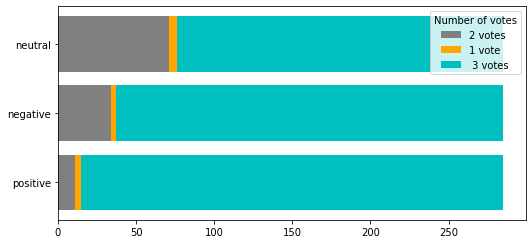

In [ ]:


from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
import numpy as np
year = ['positive', 'negative', 'neutral']
tvotes = np.array([11, 34, 71])
ovote = np.array([4, 3, 5])
thvites = [270, 248, 209]


b1 = plt.barh(year, tvotes, color="grey")

b2 = plt.barh(year, ovote, left=tvotes, color="orange")

b3 = plt.barh(year, thvites, left=ovote+tvotes, color="c")

plt.legend([b1, b2, b3], ["2 votes", "1 vote", " 3 votes"], title="Number of votes", loc="upper right")

plt.show()


In [ ]:
res

defaultdict(int, {2: 659, 3: 2191})

In [ ]:
df2 = df2[df2['sentiment'].apply(len) > 0]

In [ ]:
df2.shape

(285, 2)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/Mestrado/initial_dataset.csv')
df['labels'].fillna('', inplace=True)

In [ ]:
df

,Unnamed: 0,ID,labels,text
0,0,1237715_0,"15,16,18,21",Hello! I'm brazilian and I'm 27 y/o. My life i...
1,1,1237715_1,0,Your English is excellent. I think you probabl...
2,2,1237715_2,5,There is nothing to be ashamed of. Everyone ne...
3,3,1237715_3,"11,18",Hey!!! cant say anything but you are not alone...
4,4,1237715_4,0,Its your thyroid. Get it checked as soon as po...
...,...,...,...,...
197,197,374338_5,18,I just had a similar experience of feeling a d...
198,198,374338_6,18,Thank you for posting. I saw starting to think...
199,199,374338_7,18,During an induced 4 week coma following a hear...
200,200,374338_8,"18,20",I have been doing his for years. especially at...


In [ ]:
ola

{'agreement',
 'congratulations',
 'disagreement',
 'emotional-support',
 'esteem-support',
 'gratitude',
 'informational-support',
 'negative',
 'network-support',
 'neutral',
 'positive',
 'seeking-support',
 'sharing-experiences'}

In [ ]:
mappings_first = {
    '0': 'informational-support',
    '1': 'informational-support',
    '2': 'informational-support',

    '3':  'emotional-support',
    '4': 'emotional-support',
    '5': 'emotional-support',
    '6': 'emotional-support',
    '7': 'emotional-support',

    '8' : 'esteem-support',
    '9': 'esteem-support',
    
    '10': 'network-support',
    '11': 'network-support',

    '#12': 'tangible assistance', # this
    '#13': 'tangible assistance', # this

    '14': 'seeking-support',
    '15': 'seeking-support',

    '16': 'interpersonal',
    '17': 'interpersonal',
    '18' : 'sharing-experiences' 

}


def do(labels):
  labels = labels.split(',')
  new_labels = []
  for label in labels:
    if label in mappings_first:
      new_labels.append(mappings_first[label])
  return new_labels

df['labels'] = df['labels'].apply(do)
df = df[df['labels'].apply(len) > 0]
### this is required due to the stratified algorithm split used
df = df.reset_index(drop=True)

In [ ]:
for a in df.labels:
  print(a)

['seeking-support', 'interpersonal', 'sharing-experiences']
['informational-support']
['emotional-support']
['network-support', 'sharing-experiences']
['informational-support']
['seeking-support']
['sharing-experiences']
['seeking-support']
['seeking-support', 'sharing-experiences']
['sharing-experiences']
['sharing-experiences']
['seeking-support']
['sharing-experiences']
['informational-support']
['informational-support']
['sharing-experiences']
['informational-support', 'sharing-experiences']
['sharing-experiences']
['informational-support']
['sharing-experiences']
['sharing-experiences']
['sharing-experiences']
['seeking-support', 'sharing-experiences']
['informational-support']
['seeking-support']
['informational-support']
['seeking-support', 'seeking-support']
['informational-support', 'informational-support', 'network-support']
['informational-support']
['interpersonal']
['informational-support', 'informational-support', 'seeking-support']
['seeking-support', 'interpersonal']
['

In [ ]:
import pandas as pd
df_novo = pd.read_csv('/content/gdrive/My Drive/Mestrado/pre_processing_important.csv')

In [ ]:
resulting = pd.concat([df2, df])

In [ ]:
resulting = resulting[resulting['labels'].apply(len) > 0]

In [ ]:
resulting.reset_index(inplace=True)

In [ ]:
resulting[resulting.index.duplicated()]


,index,text,labels,Unnamed: 0,ID


In [ ]:
df_novo['labels'] = resulting['labels']

In [ ]:
df_novo

,Unnamed: 0,text,labels,text_processed
0,0,Hello and hope you are doing well.Understand y...,"[emotional-support, informational-support, net...",Hello and hope you are doing well.Understand y...
1,1,It would be hard to see any significant abnorm...,"[informational-support, sharing-experiences, e...",It would be hard to see any significant abnorm...
2,2,"Hi James, I, too, go to bed by 10:00, then wa...","[informational-support, sharing-experiences, e...","Hi James, I, tsurprised, go to bed by <TIME>, ..."
3,3,"Hi, I am suffering from the same sleep problem...",[sharing-experiences],"Hi, am suffering from the same sleep problems...."
4,4,"me too, it feels like its morning after 1hour","[sharing-experiences, esteem-support]","me tsurprised, it feels like its <TIME> after ..."
...,...,...,...,...
448,448,I just had a similar experience of feeling a d...,[sharing-experiences],just had similar eplayfulerience of feeling dr...
449,449,Thank you for posting. I saw starting to think...,[sharing-experiences],Thank you for posting. saw starting to think w...
450,450,During an induced 4 week coma following a hear...,[sharing-experiences],During <DATE> <DISEASE> following heart operat...
451,451,I have been doing his for years. especially at...,[sharing-experiences],have been doing his for <DATE>. especially at ...


In [ ]:
### some things random

d = defaultdict(int)

for labels in resulting['labels']:
  for label in labels:
    d[label] += 1

In [ ]:
d

defaultdict(int,
            {'emotional-support': 75,
             'esteem-support': 34,
             'informational-support': 224,
             'interpersonal': 98,
             'network-support': 37,
             'seeking-support': 136,
             'sharing-experiences': 200})

In [ ]:
df_novo.to_csv('second_level_preprocessed.csv')